<a href="https://colab.research.google.com/github/Marco-barthem/Sentiment-Analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
sns.set_style('darkgrid')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [79]:
from wordcloud import WordCloud

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Marco-barthem/Sentiment-Analysis/refs/heads/main/ReviewsAmazonShort.csv')
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Exploration Data Analysis

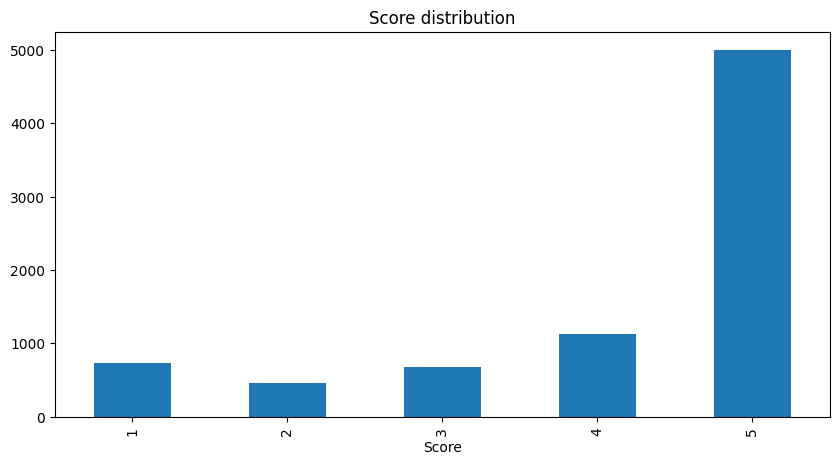

Text(4.444444444444452, 0.5, 'Frequency')

In [9]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',title='Score distribution',figsize=(10,5))
plt.show()
ax.set_xlabel('Score')
ax.set_ylabel('Frequency')

## Basic NLTK

In [10]:
example =  df['Text'][50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [69]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens_test = tokenizer.tokenize(example)
tokens_test

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 'Its',
 'mushy',
 'soft',
 'I',
 'don',
 't',
 'like',
 'it',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go']

In [25]:
tagged_test = nltk.pos_tag(tokens_test)
tagged_test[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('Its', 'PRP$'),
 ('mushy', 'JJ'),
 ('soft', 'JJ'),
 ('I', 'PRP'),
 ('don', 'VBP')]

## VADER - Valence Aware Dictionary and sEntiment Reasoner

- **O que é VADER?**  
  → É uma ferramenta de **análise de sentimentos** que utiliza um **dicionário** e um conjunto de regras de **pontuação** e **intensidade emocional** para determinar o **sentimento** de um texto.

- **Nome:**  
  → **VADER** significa **Valence Aware Dictionary and sEntiment Reasoner**.

- **Objetivo:**  
  → Realizar a **análise de sentimentos** de textos curtos, como **tweets**, resenhas e postagens em redes sociais, com uma abordagem **baseada em léxico**.

- **Como funciona:**  
  → VADER usa um dicionário de palavras com informações sobre seu **sentimento** (positivo, negativo, neutro) e ajusta a pontuação com base em regras como **capitalização**, **emoticons**, **grau de ênfase** e outros fatores contextuais.

- **Diferenciais:**  
  → É **específico** para textos curtos e **informais**, como **redes sociais**, diferente de outras abordagens como o **TextBlob** ou **Naive Bayes**, que podem não lidar tão bem com esse tipo de dado.

- **Resultados:**  
  → VADER atribui uma **pontuação de sentimento** que varia de -1 (negativo) a +1 (positivo), com 0 indicando neutralidade.

- **Disponibilidade:**  
  → O VADER está disponível no **nltk** e pode ser facilmente utilizado para tarefas de análise de sentimentos em textos em inglês.

- **Aplicações:**  
  → Ideal para análise de sentimentos em **redes sociais**, **resenhas de produtos**, **análises de marketing**, entre outros.


In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [36]:

print(sia.polarity_scores("I hate this product"))
print(sia.polarity_scores("I Love this product"))

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}


In [37]:
# Runing the polarity score in the dataset
res ={}
for i, row in tqdm(df.iterrows(),total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/8000 [00:00<?, ?it/s]

In [42]:
result_polarity_score = pd.DataFrame(res).T
result_polarity_score = result_polarity_score.reset_index().rename(columns={'index':'Id'})
df = df.merge(result_polarity_score,how='left')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,B001M09ATY,A2CW9XSV8YTGKK,Brian J. Binder,0,0,5,1316044800,Fanastic,Can't find this product anywhere locally - tha...,0.000,0.611,0.389,0.9020
7996,7997,B001M09ATY,AAFT7UQI6TOGE,"J. Diaz ""wanna be a balabusta""",0,0,4,1300406400,Oatmeal makes for winter warmth,My kids have eaten oatmeal everyday since the ...,0.055,0.752,0.192,0.9077
7997,7998,B001M09ATY,A13WBUX01Q4D35,A. Beckstedt,0,0,5,1296950400,An oatmeal explosion of goodness,"Are you sick of the regular flavors? Plain, ap...",0.053,0.856,0.091,0.5987
7998,7999,B001M09ATY,A22097Y3ZY7M14,Don D.,0,0,5,1249948800,Quaker Instant Oatmeal Bakery Favorites,This particular variety box contains 3 of my v...,0.000,0.845,0.155,0.5095


## Plot Vader Result

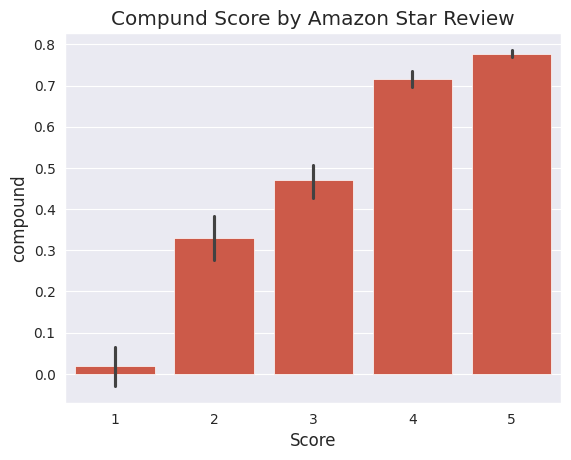

In [50]:
ax = sns.barplot(data=df, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

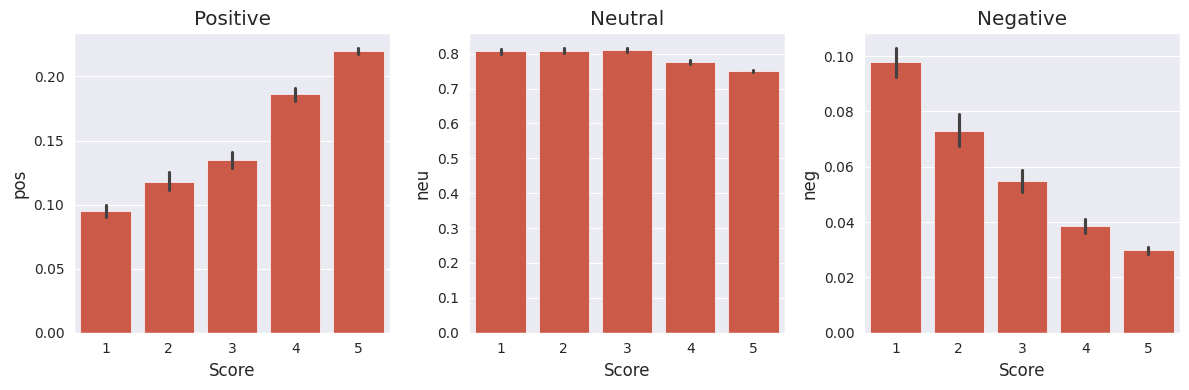

In [52]:
fig, axs = plt.subplots(1, #Row
                        3, #Columns
                        figsize=(12, 4))
sns.barplot(data=df, x='Score', y='pos', ax=axs[0])
sns.barplot(data=df, x='Score', y='neu', ax=axs[1])
sns.barplot(data=df, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [77]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import download
nltk.download('punkt_tab')
download('stopwords')
stop_words = set(stopwords.words('english'))
positive_words = []
negative_words = []
for text in df['Text']:
    # Analisando o sentimento da frase
    sentiment_score = sia.polarity_scores(text)

    # Tokenizando o texto
    tokens = word_tokenize(text.lower())  # Convertendo para minúsculas
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Remover números e stopwords

    # Classificando as palavras com base na pontuação
    if sentiment_score['compound'] >= 0.05:  # Sentimento positivo
        positive_words.extend(tokens)
    elif sentiment_score['compound'] <= -0.05:  # Sentimento negativo
        negative_words.extend(tokens)

# Verificando as palavras positivas e negativas
print(f"Palavras positivas: {positive_words}")
print(f"Palavras negativas: {negative_words}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Palavras positivas: ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better', 'confection', 'around', 'centuries', 'light', 'pillowy', 'citrus', 'gelatin', 'nuts', 'case', 'filberts', 'cut', 'tiny', 'squares', 'liberally', 'coated', 'powdered', 'sugar', 'tiny', 'mouthful', 'heaven', 'chewy', 'flavorful', 'highly', 'recommend', 'yummy', 'treat', 'familiar', 'story', 'lewis', 'lion', 'witch', 'wardrobe', 'treat', 'seduces', 'edmund', 'selling', 'brother', 'sisters', 'witch', 'great', 'taffy', 'great', 'price', 'wide', 'assortment', 'yummy', 'taffy', 'delivery', 'quick', 'taffy', 'lover', 'deal', 'got', 'wild', 'hair', 'taffy', 'ordered', 'five', 'pound', 'bag', 'taffy', 'enjoyable', 'many', 'flavors', 'watermelon', 'root', 'beer', 'melon', 'peppermint', 'grape', 'etc', 'complaint', 'bit', 'much', 'pieces', 'partic

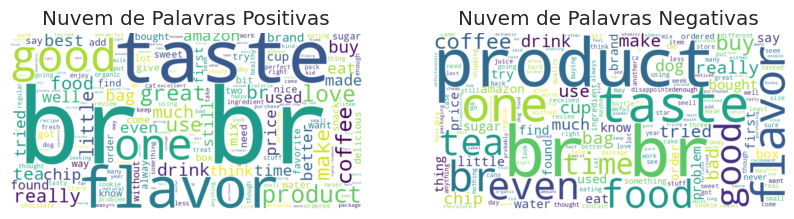

In [80]:
# Gerar a nuvem de palavras positivas
positive_words_string = ' '.join(positive_words)  # Transformar a lista de palavras em uma string
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words_string)

# Gerar a nuvem de palavras negativas
negative_words_string = ' '.join(negative_words)  # Transformar a lista de palavras em uma string
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words_string)

# Plotando as nuvens de palavras
plt.figure(figsize=(10, 8))

# Nuvem de palavras positivas
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Nuvem de Palavras Positivas')
plt.axis('off')

# Nuvem de palavras negativas
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Nuvem de Palavras Negativas')
plt.axis('off')

plt.show()